In [41]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [42]:
# Reading the files needed for the analysis
stock_pct_reduced = pd.read_csv('Outputs/stock_pct_reduced.csv')
indices_pct = pd.read_csv('Outputs/indices_pct_clean.csv')
optimal_risky_portfolio = pd.read_csv('Outputs/Optimal_risky_portfolio.csv')

combined = pd.concat([stock_pct_reduced,indices_pct], axis=1)

In [43]:
cov_matrix = combined.cov()*252


In [44]:
# Calculating the Beta of each one of the stocks

Beta = []

for stock in stock_pct_reduced:
    temp = (cov_matrix.loc["SnP",stock]) / (cov_matrix.loc["SnP","SnP"])
    Beta.append(temp)

stocks_tickers = stock_pct_reduced.columns.to_list()
Betas = pd.DataFrame({"Beta":Beta},index = stocks_tickers).reset_index()

Betas


,index,Beta
0,CVX,-0.154297
1,CAT,-0.163706
2,MRK,-0.008013
3,TRV,-0.047879
4,AMGN,0.027945


In [45]:
weights = optimal_risky_portfolio.rename(columns={"Unnamed: 0":"Stocks","6417":"Weights"}).drop(labels=[0,1]).reset_index(drop=True)
weights

,Stocks,Weights
0,CVX weight,0.260949
1,CAT weight,0.086227
2,MRK weight,0.618342
3,TRV weight,0.020639
4,AMGN weight,0.013843


In [46]:
# Optimal Portfolio Beta
# port_beta = sum(Betas["Beta"]*weights["Weights"])
port_beta = Betas["Beta"].mul(weights["Weights"]).sum()
port_beta


-0.05993566966625108

Text(0.5, 1.0, 'Return vs Beta for Selected Stocks')

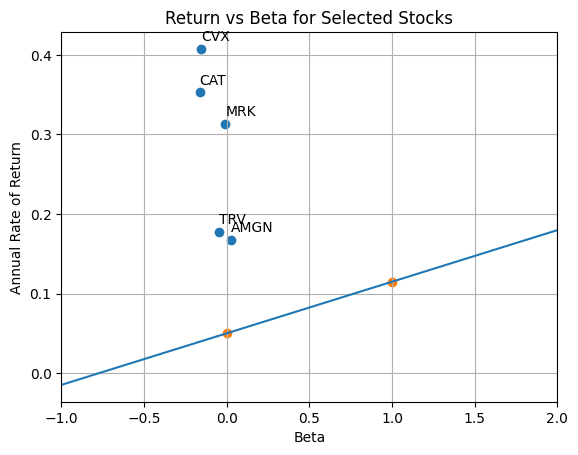

In [50]:
# Calculating again annual returns
annual_return_stocks = stock_pct_reduced.mean()*252
annual_return_indices = indices_pct.mean()*252

# Plotting the Security Market Line (SML)

slope = annual_return_indices["SnP"] - 0.050
x_line = [-1,2] # Beta of risk free asset is 0, Beta of S&P500 is 1
y_line = [x_line[0]*slope+0.05,x_line[1]*slope+0.05]


plt.plot(x_line,y_line)
plt.scatter(Betas["Beta"],annual_return_stocks)
plt.scatter([0,1],[0.05,annual_return_indices["SnP"]])
plt.grid()
plt.xlim(-1,2)
for i in range(len(annual_return_stocks)):
    plt.annotate(Betas["index"][i], (Betas["Beta"][i], annual_return_stocks[i] + 0.01))
plt.xlabel("Beta")
plt.ylabel("Annual Rate of Return")
plt.title("Return vs Beta for Selected Stocks")


